# Case Study on Titanic dataset


**Name: Frason Francis**  
**ID: 201903020**



In [32]:
#importing of required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
#allow plots and visualisations to be displayed in the report
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
# Read csv into Pandas Dataframe and store in dataset variable
titanic_df = pd.read_csv('titanic_data.csv')

In [7]:
# print out information about the data
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


After printing out the dataset information above, we can see that the Age, Cabin and Embarked columns are missing entries. 

# Missing Values in Data


In [8]:
total_miss = titanic_df.isnull().sum()
percent_miss = (total_miss/titanic_df.isnull().count()*100)

# Creating dataframe from dictionary
missing_data = pd.DataFrame({'Total missing':total_miss,'% missing':percent_miss})

missing_data.sort_values(by='Total missing',ascending=False).head()

,Total missing,% missing
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
PassengerId,0,0.000000
Survived,0,0.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
------------------------------------------------------------------------------------------------------------------------ 


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
S

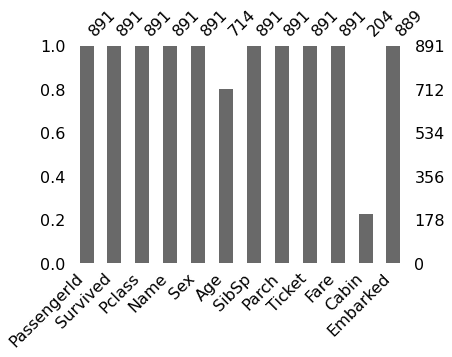

In [9]:
# Visualizing Missing Data
import missingno as msno

missing_data = msno.bar(titanic_df, figsize=(6,4))
print(titanic_df.info())
print('------'* 20 , '\n\n')
print(titanic_df.isnull().sum())
print('------'* 20 , '\n\n')
print(missing_data)

# Dropping Missing Data 

In [10]:
df = titanic_df.dropna()
print('origional shape: ',titanic_df.shape, '----->', 'New Shape',df.shape)

origional shape:  (891, 12) -----> New Shape (183, 12)


In [11]:
#women survival 
women = df[df.Sex == 'female']["Survived"]
#men survival 
men = df[df.Sex == 'male']["Survived"]
print("Survival rate for women is {:.2f} and for men is {:.2f}".format((sum(women)/len(women))*100, (sum(men)/len(men))*100))

Survival rate for women is 93.18 and for men is 43.16


In [33]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,deck
449,450,1,1,"Peuchen, Major. Arthur Godfrey",male,52.0,0,0,113786,30.5000,C104,S,C
587,588,1,1,"Frolicher-Stehli, Mr. Maxmillian",male,60.0,1,1,13567,79.2000,B41,C,B
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S,A
647,648,1,1,"Simonius-Blumer, Col. Oberst Alfons",male,56.0,0,0,13213,35.5000,A26,C,A
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S,E
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,C
195,196,1,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,B80,C,B
268,269,1,1,"Graham, Mrs. William Thompson (Edith Junkins)",female,58.0,0,1,PC 17582,153.4625,C125,S,C
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S,D
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C,B


In [14]:
data = df

There were 8 decks: the upperdeck - for lifeboats, other 7 were under it and had letter symbols:

1. A: it did not run the entire length of the vessel (i.e. it did not reach from the stern to the bow of the vessel), and was intended for passengers of the 1st class.
2. B: it did not run the entire length of the ship (it was interrupted by 37 meters above the C deck, and served as a place for anchors in the front).
3. C: in the front part of the galley, dining room for the crew, as well as a walking area for passengers of the 3rd class.
4. D: a walking area for passengers .
5. E: cabins of the 1st and 2nd class.
6. F: part of the passenger cabins of the 2nd class, most of the cabins of the 3rd class.
7. G: did not run the entire length of the ship, the boiler rooms were located in the center.
8. T - boat deck ?
To the passengers without deck information I will imput U letter (as unknown).

In [15]:
data['deck'] = data['Cabin'].str.split('', expand = True)[1]
data.loc[data['deck'].isna(), 'deck'] = 'U'
print('Unique deck letters from the cabin numbers:', data['deck'].unique())

Unique deck letters from the cabin numbers: ['C' 'E' 'G' 'D' 'A' 'B' 'F' 'T']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# EDA

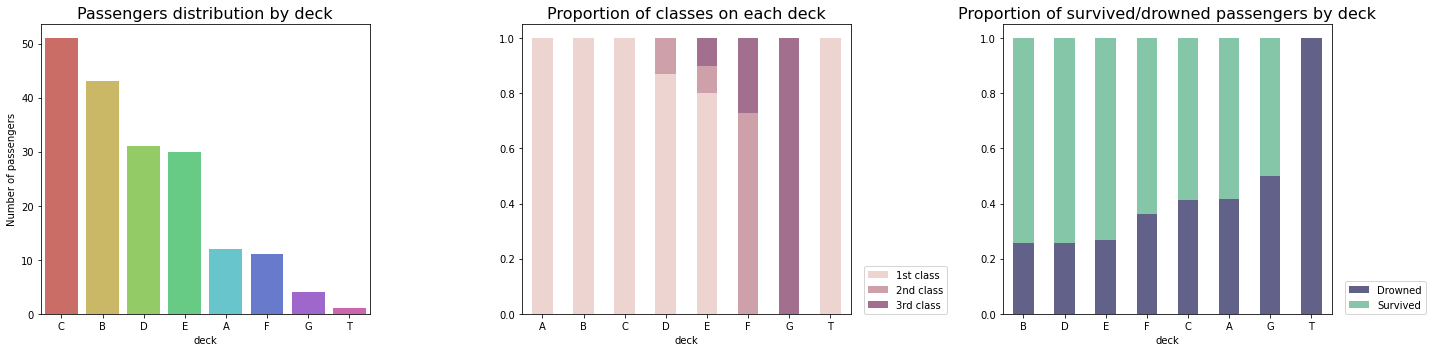

In [16]:
fig = plt.figure(figsize=(20, 5))

ax1 = fig.add_subplot(131)
sns.countplot(x = 'deck', data = data, palette = "hls", order = data['deck'].value_counts().index, ax = ax1)
plt.title('Passengers distribution by deck',fontsize= 16)
plt.ylabel('Number of passengers')

ax2 = fig.add_subplot(132)
deck_by_class = data.groupby('deck')['Pclass'].value_counts(normalize = True).unstack()
deck_by_class.plot(kind='bar', stacked='True',color = ['#eed4d0', '#cda0aa', '#a2708e'], ax = ax2)
plt.legend(('1st class', '2nd class', '3rd class'), loc=(1.04,0))
plt.title('Proportion of classes on each deck',fontsize= 16)
plt.xticks(rotation = False)

ax3 = fig.add_subplot(133)
deck_by_survived = data.groupby('deck')['Survived'].value_counts(normalize = True).unstack()
deck_by_survived = deck_by_survived.sort_values(by = 1, ascending = False)
deck_by_survived.plot(kind='bar', stacked='True', color=["#3f3e6fd1", "#85c6a9"], ax = ax3)
plt.title('Proportion of survived/drowned passengers by deck',fontsize= 16)
plt.legend(( 'Drowned', 'Survived'), loc=(1.04,0))
plt.xticks(rotation = False)
plt.tight_layout()

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



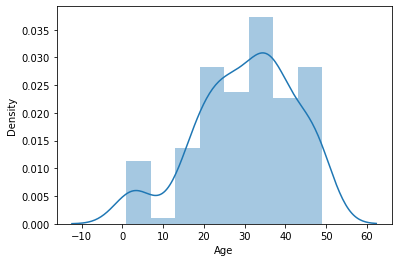

In [17]:
sns.distplot(data[(data["Age"] < 50)].Age )#, kde_kws={"lw": 3}, bins = 50)

kde graph distribution of the passanger present with an age of 50 and less

In [18]:
data[data['Age'] < 50 ]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,deck
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,G
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S,D
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...
867,868,0,1,"Roebling, Mr. Washington Augustus II",male,31.0,0,0,PC 17590,50.4958,A24,S,A
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,D
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S,B
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,B


list of passenger with age less than 50

In [19]:
df_filtered = df[(data.Survived	== 1) & (data.Age >= 50)]
print(df_filtered)

     PassengerId  Survived  Pclass  ...    Cabin Embarked  deck
11            12         1       1  ...     C103        S     C
195          196         1       1  ...      B80        C     B
268          269         1       1  ...     C125        S     C
275          276         1       1  ...       D7        S     D
299          300         1       1  ...  B58 B60        C     B
366          367         1       1  ...      D37        C     D
449          450         1       1  ...     C104        S     C
496          497         1       1  ...      D20        C     D
571          572         1       1  ...     C101        S     C
587          588         1       1  ...      B41        C     B
591          592         1       1  ...      D20        C     D
630          631         1       1  ...      A23        S     A
647          648         1       1  ...      A26        C     A
765          766         1       1  ...      D11        S     D
820          821         1       1  ... 

list of passenger who survived with an age less than 50 

In [34]:
df_men = df[(data.Survived	== 1) & (data.Age >= 50) & (data.Sex == 'male')] #contains men who survived with an age less than 50
print(df_men) # 5 Men survived with an age less than 50
df_female = df[(data.Survived	== 1) & (data.Age >= 50) & (data.Sex == 'female')] #contains men who survived with an age less than 50
print(df_female) # 12 female survived with an age less than 50

     PassengerId  Survived  Pclass  ... Cabin Embarked  deck
449          450         1       1  ...  C104        S     C
587          588         1       1  ...   B41        C     B
630          631         1       1  ...   A23        S     A
647          648         1       1  ...   A26        C     A
857          858         1       1  ...   E17        S     E

[5 rows x 13 columns]
     PassengerId  Survived  Pclass  ...    Cabin Embarked  deck
11            12         1       1  ...     C103        S     C
195          196         1       1  ...      B80        C     B
268          269         1       1  ...     C125        S     C
275          276         1       1  ...       D7        S     D
299          300         1       1  ...  B58 B60        C     B
366          367         1       1  ...      D37        C     D
496          497         1       1  ...      D20        C     D
571          572         1       1  ...     C101        S     C
591          592         1       1 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [28]:
frames = [df_men, df_female] #concatenating the two final data

#concatenate dataframes
df_new = pd.concat(frames, sort=False)

In [29]:
df_new

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,deck
449,450,1,1,"Peuchen, Major. Arthur Godfrey",male,52.0,0,0,113786,30.5000,C104,S,C
587,588,1,1,"Frolicher-Stehli, Mr. Maxmillian",male,60.0,1,1,13567,79.2000,B41,C,B
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S,A
647,648,1,1,"Simonius-Blumer, Col. Oberst Alfons",male,56.0,0,0,13213,35.5000,A26,C,A
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S,E
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,C
195,196,1,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,B80,C,B
268,269,1,1,"Graham, Mrs. William Thompson (Edith Junkins)",female,58.0,0,1,PC 17582,153.4625,C125,S,C
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S,D
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C,B


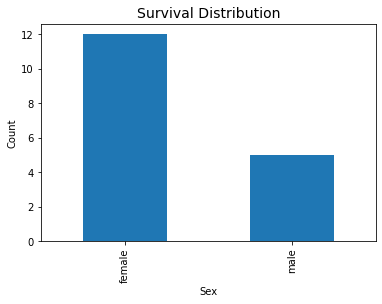

In [31]:
# Survival Distribution VS Sex plot 

df_new.groupby(['Sex']).size().plot(kind='bar',stacked=True)
plt.title("Survival Distribution",fontsize=14)
plt.ylabel('Count')
plt.xlabel('Sex');